In [2]:
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from necro_uncal_new import model

logps0 = np.load('necro_smallest_dreamzs22020_5chain_logps_chain_0_20000.npy')
logps1 = np.load('necro_smallest_dreamzs22020_5chain_logps_chain_1_20000.npy')
logps2 = np.load('necro_smallest_dreamzs22020_5chain_logps_chain_2_20000.npy')
logps3 = np.load('necro_smallest_dreamzs22020_5chain_logps_chain_3_20000.npy')
logps4 = np.load('necro_smallest_dreamzs22020_5chain_logps_chain_4_20000.npy')

# logps00 = np.load('necro_smallest_dreamzs21320_5chain_logps_chain_0_40000.npy')
# logps11 = np.load('necro_smallest_dreamzs21320_5chain_logps_chain_1_40000.npy')
# logps22 = np.load('necro_smallest_dreamzs21320_5chain_logps_chain_2_40000.npy')
# logps33 = np.load('necro_smallest_dreamzs21320_5chain_logps_chain_3_40000.npy')
# logps44 = np.load('necro_smallest_dreamzs21320_5chain_logps_chain_4_40000.npy')

chain0 = np.load('necro_smallest_dreamzs22020_5chain_sampled_params_chain_0_20000.npy')
chain1 = np.load('necro_smallest_dreamzs22020_5chain_sampled_params_chain_1_20000.npy')
chain2 = np.load('necro_smallest_dreamzs22020_5chain_sampled_params_chain_2_20000.npy')
chain3 = np.load('necro_smallest_dreamzs22020_5chain_sampled_params_chain_3_20000.npy')
chain4 = np.load('necro_smallest_dreamzs22020_5chain_sampled_params_chain_4_20000.npy')

# chain00 = np.load('necro_smallest_dreamzs21320_5chain_sampled_params_chain_0_40000.npy')
# chain11 = np.load('necro_smallest_dreamzs21320_5chain_sampled_params_chain_1_40000.npy')
# chain22 = np.load('necro_smallest_dreamzs21320_5chain_sampled_params_chain_2_40000.npy')
# chain33 = np.load('necro_smallest_dreamzs21320_5chain_sampled_params_chain_3_40000.npy')
# chain44 = np.load('necro_smallest_dreamzs21320_5chain_sampled_params_chain_4_40000.npy')

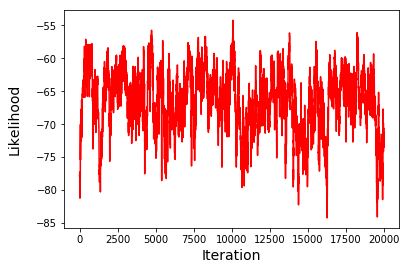

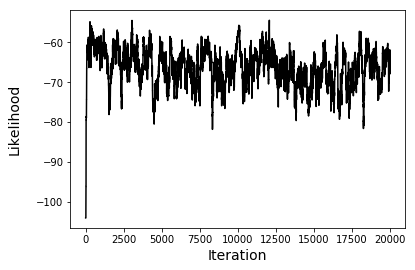

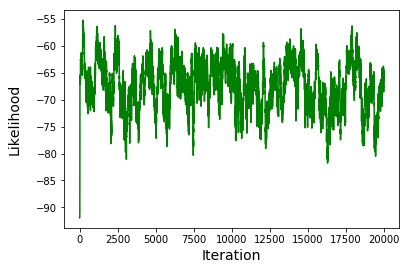

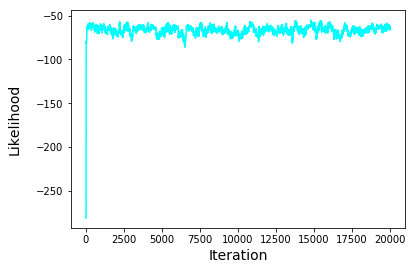

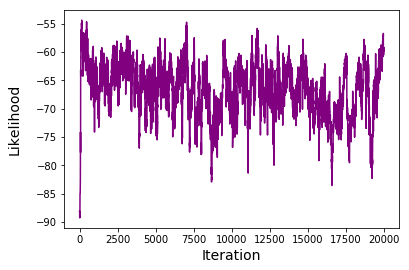

In [3]:
iters = [i for i in range(20000)]

plt.figure()
# plt.subplot(152)
plt.plot(iters, logps0, color = 'red')
plt.xlabel("Iteration", fontsize=14)
plt.ylabel("Likelihood", fontsize=14, labelpad=15)
plt.figure()
# plt.subplot(153)
plt.plot(iters, logps1, color = 'k')
plt.xlabel("Iteration", fontsize=14)
plt.ylabel("Likelihood", fontsize=14, labelpad=15)
plt.figure()
# plt.subplot(154)
plt.plot(iters, logps2, color = 'g') #best
plt.xlabel("Iteration", fontsize=14)
plt.ylabel("Likelihood", fontsize=14, labelpad=15)

plt.figure()
# plt.subplot(154)
plt.plot(iters, logps3, color = 'cyan') #best
plt.xlabel("Iteration", fontsize=14)
plt.ylabel("Likelihood", fontsize=14, labelpad=15)

plt.figure()
# plt.subplot(154)
plt.plot(iters, logps4, color = 'purple') #best
plt.xlabel("Iteration", fontsize=14)
plt.ylabel("Likelihood", fontsize=14, labelpad=15)
plt.show()

In [4]:
total_iterations = chain0.shape[0] 
burnin = int(total_iterations / 2)
samples = np.concatenate((chain0[burnin:, :],chain1[burnin:, :],chain2[burnin:, :],chain3[burnin:, :]
                          ,chain4[burnin:, :]))

In [5]:
u, indices, counts = np.unique(samples, return_index=True, return_counts=True, axis=0)

sorted_counts_idx = np.argsort(counts)

print(len(sorted_counts_idx))
# print(len(u[6

19807


In [6]:
np.save('most_likely_par_19807_newestpydream_2_20_20_sorted.npy', u[sorted_counts_idx[:]])

In [7]:
from pylab import *
from pysb.core import *
from pysb.bng import *
from pysb.integrate import *
import matplotlib.pyplot as plt
import numpy as np
from pysb.util import alias_model_components
from pysb.simulator import CupSodaSimulator
from pysb.simulator import ScipyOdeSimulator
from pysb.simulator.bng import BngSimulator
import pandas as pd
# alias_model_components(model100, model10, model1, model01)
from scipy import stats
from pysb.simulator import SimulationResult
import sys
sys.path.append('..')
%matplotlib inline

In [8]:
from pysb.core import ComponentSet, Model
from pysb.simulator import SimulationResult
import weakref
from contextlib import contextmanager

def _model_setstate_monkey_patch(self, state):
    """Monkey patch for Model.__setstate__ for restoring from older pickles"""

    # restore the 'model' weakrefs on all components
    self.__dict__.update(state)
    # Set "tags" attribute for older, pickled models
    self.__dict__.setdefault('tags', ComponentSet())
    for c in self.all_components():
        c.model = weakref.ref(self)

@contextmanager
def _patch_model_setstate():
    old_setstate = Model.__setstate__
    Model.__setstate__ = _model_setstate_monkey_patch
    try:
        yield
    finally:
        Model.__setstate__ = old_setstate

def simulation_result_load(filename, dataset_name=None, group_name=None):
    with _patch_model_setstate():
        return SimulationResult.load(filename, dataset_name, group_name)

In [9]:
par_files = np.load('most_likely_par_19807_newestpydream_2_20_20_sorted.npy')
n_pars = len(par_files)
all_pars = np.zeros((n_pars, len(model.parameters)))

rate_params = model.parameters_rules() # these are only the parameters involved in the rules
param_values = np.array([p.value for p in model.parameters]) # these are all the parameters
rate_mask = np.array([p in rate_params for p in model.parameters])

for i in range(n_pars):
    par = par_files[i]
    param_values[rate_mask] = 10 ** par
    all_pars[i] = param_values
print(len(all_pars))    

19807


In [10]:
print('running simulations 100')
tspan = np.linspace(0, 1440, 300)
solver100 = ScipyOdeSimulator(model, tspan=tspan, verbose = True)
result100 = solver100.run(param_values=all_pars[:], num_processors = 100)
# result100.save('necro_pydream_5chns_11220_100tnf_10000.h5')
df1 = result100.dataframe

2020-02-23 21:59:38.333 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new] Simulator created


running simulations 100


2020-02-23 21:59:42.643 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new] Equation mode set to "cython"
2020-02-23 21:59:42.765 - pysb.simulator.scipyode - INFO - [necro_uncal_new] Simulation(s) started
2020-02-23 21:59:48.605 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new] Multi-processor (parallel) mode using 100 processes
2020-02-24 08:23:08.084 - pysb.simulator.scipyode - INFO - [necro_uncal_new] All simulation(s) complete
2020-02-24 08:23:08.086 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new] SimulationResult constructor started
2020-02-24 08:23:16.440 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new] SimulationResult constructor finished


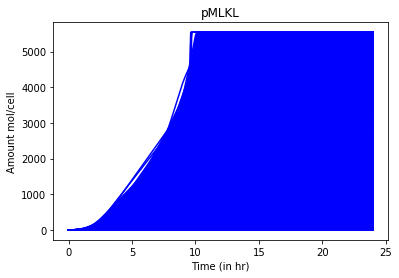

In [11]:
plt.figure()
for n in range(len(all_pars)):
    plt.plot(tspan/60, df1.loc[n]['MLKLa_obs'].iloc[:],lw=1.5, color ='blue', zorder = 1)
#     plt.scatter(x,y, zorder = 2)
    # plt.plot(tspan / 60, df.loc[n]['RIP1deub_obs'].iloc[:] / df.loc[n]['RIP1deub_obs'].iloc[:].max(), lw=1.5)
    # plt.plot(tspan / 60, df.loc[n]['RIP1trunc_obs'].iloc[:] / df.loc[n]['RIP1trunc_obs'].iloc[:].max(), lw=1.5)
# plt.plot(tspan/60, simulation /_result.observables['CII_C8a_obs'], label = 'CII_C8a')
plt.xlabel("Time (in hr)", fontsize=10)
plt.ylabel("Amount mol/cell", fontsize=10)
plt.title('pMLKL')
# plt.ylim(ymin = -10, ymax =100)
# plt.legend(loc=0)
plt.show()